In [6]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
import numpy as np

In [12]:
def copy(n): # |x>|0> => |x>|x>
    x = QuantumRegister(size=n, name="x")
    z = QuantumRegister(size=n, name="z")
    copy_circuit = QuantumCircuit(x, z, name="copy")
    
    for i in range(n):
        copy_circuit.cx(x[i], z[i])

    return copy_circuit

def quantum_fourier_transform(n): # |x1x2...xn> => |F(x1)F(x2)...F(xn)>
    quantum_register = QuantumRegister(size=n, name="x")
    QFT_circuit = QuantumCircuit(quantum_register, name=f"QFT")

    for q, p in zip(quantum_register[:n >> 1], reversed(quantum_register[n >> 1:])):
        QFT_circuit.swap(q, p)

    for i, q in enumerate(quantum_register, start=1):
        QFT_circuit.h(q)
        for j, p in enumerate(quantum_register[i:], start=1):
            QFT_circuit.cp(np.pi / (1 << j), q, p)

    return QFT_circuit.to_gate()

def inverse_quantum_fourier_transform(n): # |F(a1)F(a2)...F(an)> => |a1a2...an>
    quantum_register = QuantumRegister(size=n, name="x")
    inverse_QFT_circuit = QuantumCircuit(quantum_register, name=f"iQFT")

    for i, q in enumerate(reversed(quantum_register), start=1):
        for j, p in enumerate(reversed(quantum_register[n + 1 - i:]), start=1):
            inverse_QFT_circuit.cp(- np.pi / (1 << (i - j)), q, p)
        inverse_QFT_circuit.h(q)

    for q, p in zip(quantum_register[:n >> 1], reversed(quantum_register[n >> 1:])):
        inverse_QFT_circuit.swap(q, p)

    return inverse_QFT_circuit.to_gate()

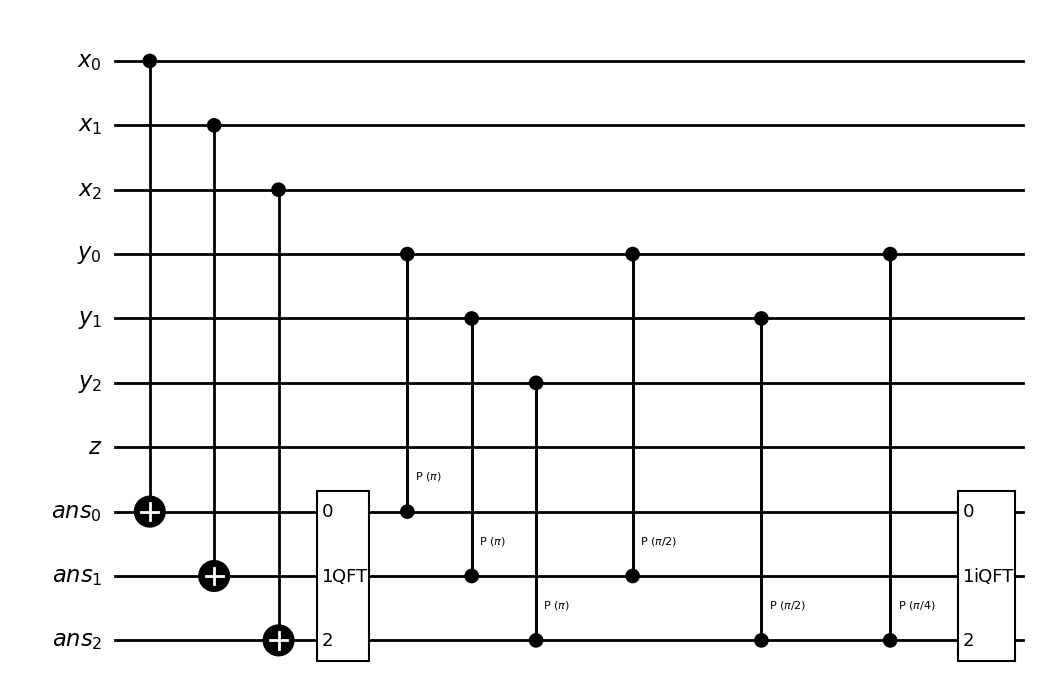

In [19]:
def OutAdder(d):
    x = QuantumRegister(size=d, name="x")
    y = QuantumRegister(size=d, name="y")
    z = QuantumRegister(size=1, name="z")
    ans = QuantumRegister(size=d, name="ans"); arange = range(2*d+1,3*d+1)
    circ = QuantumCircuit(x, y, z, ans, name=f"{d}-digit outplace adder")

    circ.compose(copy(d), qubits=list(range(d))+list(arange), inplace=True)

    circ.compose(quantum_fourier_transform(d), qubits=arange, inplace=True)

    for i in range(d):
        for j in range(i,d):
            circ.cp(2*np.pi/2**(i+1), y[j-i], ans[j])

    circ.compose(inverse_quantum_fourier_transform(d), qubits=arange, inplace=True)

    return circ
c3 = OutAdder(3)
c3.draw(output="mpl", style="bw")